In [1]:
############# RANDOM FOREST ###############
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn import svm
#from sklearn.cross_validation import train_test_split
#import sklearn.metrics.plot_roc_curve
import glob
import os

In [2]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))
############# REMEMBER TO PUT YOUR PATH HERE ###############
df = pd.read_excel(r'wellMa1.xlsx') #.sample(n=2500)
#dfb = pd.read_excel(r'well4fit.xlsx').sample(n=500)
#df = pd.concat([dfa, dfb], sort=False)
#df = pd.read_excel(r'/home/mob/training/c1/well1234MATTEO.xlsx')
#df = pd.concat(map(pd.read_excel, glob.glob(os.path.join('/home/mob/training/c1/', "w*.xlsx")))).sample(n=5000)
#df = pd.read_excel(r'/home/mob/training/c1/well123fit.xlsx').sample(n=2000)
print(df)

facies_colors = ['#F4D03F', '#F5B041', '#DC7633','#6E2C00', '#1B4F72', '#2E86C1', '#AED6F1', '#A569BD']
labels = ['Argille', 'Calcari', 'Marne', 'Calcari dolomitizzati', 'Dolomie', 'Dolomie calcaree e anidriti', 'Argilloscisti', 'Dolomia e anidrite']
labels2 = ['Argilloscisti', 'Dolomia e anidrite']
labelsdfa = ['Argille', 'Calcari', 'Marne', 'Calcari dolomitizzati', 'Dolomie', 'Dolomie calcaree e anidriti', 'Argilloscisti']
df = df.dropna() # First step - remove the NULL values
df.shape # Shape the dataset
#dfa.shape
#dropcol = ['Depth', 'Litologia', 'Litologia Code']

The scikit-learn version is 0.22.1.
             Well_name      Depth  Gamma_Ray  Spontaneous_Potential  \
0      01_VILLADEGNA1.   440.0276    27.1000                51.1684   
1      01_VILLADEGNA1.   440.1800    25.5000                51.1684   
2      01_VILLADEGNA1.   440.3324    23.6000                50.9275   
3      01_VILLADEGNA1.   440.4848    21.1000                50.9275   
4      01_VILLADEGNA1.   440.6372    22.1000                50.6865   
5      01_VILLADEGNA1.   440.7896    20.6000                51.1684   
6      01_VILLADEGNA1.   440.9420    19.8000                52.1323   
7      01_VILLADEGNA1.   441.0944    19.2000                53.5781   
8      01_VILLADEGNA1.   441.2468    19.8000                54.0601   
9      01_VILLADEGNA1.   441.3992    20.7000                53.8191   
10     01_VILLADEGNA1.   441.5516    21.8000                54.0601   
11     01_VILLADEGNA1.   441.7040    23.9000                53.8191   
12     01_VILLADEGNA1.   441.8564    24.1

(42377, 7)

In [3]:
#print(dfa)

In [4]:
def my_plot_values(logs, facies_colors):
    
    ### The logs will be the dataset (df) information that we passes
    logs = logs.sort_values(by='Depth')
    
    # Build the colormap
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    # Create the cluster we will plot
    cluster = np.repeat(np.expand_dims(logs['Litologia_Code'].values,1), 100, 1)
    
    # plot the bars and assign for each bar a different information (Gamma Ray, Spontaneous Potential, Neutron Porosity)
    f, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (8, 12))
    ax[0].plot(logs.Gamma_Ray, logs.Depth, '-g')
    ax[1].plot(logs.Spontaneous_Potential, logs.Depth, '-')
    ax[2].plot(logs.Neutron_Porosity, logs.Depth, '-', color = '0.5')
    
    # Here we will show the bar cluster with all the information and colormap legend
    im = ax[3].imshow(cluster, interpolation = 'none', aspect = 'auto', cmap = cmap_facies, vmin = 1, vmax = 9)
    
    ### Here we plot the "divider" which is the little bar showed next to the last bar (with colormap legend)
    divider = make_axes_locatable(ax[3])
    cax = divider.append_axes("right", size = "20%", pad = 0.05)
    cbar = plt.colorbar(im, cax = cax)
    #cbar.set_label((17*' ').join(['Argille', 'Calcari', 'Marne', 'Calcari dolomitizzati', 'Dolomie', 'Dolomie calcaree e anidriti', 'Argilloscisti', 'Dolomia e anidrite']))
    cbar.set_label((17*' ').join(['D&A','ARG', 'DCA', 'DOL', 'CCDOL', 'MRN', 'CC', 'ARLLE']))
    cbar.set_ticks(range(0,1))
    cbar.set_ticklabels('')
    
    ### Here we will plot the little lines inside each bar
    for i in range(len(ax)-1):
        ax[i].set_ylim(logs.Depth.min(),logs.Depth.max())
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis = 'x', nbins = 3)
    
    
    ### Here we will put the names of each bar and set the x limits
    ax[0].set_xlabel("Gamma Ray")
    ax[0].set_xlim(logs.Gamma_Ray.min(),logs.Gamma_Ray.max())
    ax[1].set_xlabel("Spontaneous Potential")
    ax[1].set_xlim(logs.Spontaneous_Potential.min(),logs.Spontaneous_Potential.max())
    ax[2].set_xlabel("Neutron Porosity")
    ax[2].set_xlim(logs.Neutron_Porosity.min(),logs.Neutron_Porosity.max())
    ax[3].set_xlabel("Litologia")
    
    ### Here we set the y-tick labes for each bar
    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])
    ax[3].set_yticklabels([])

In [5]:
###### LEGEND OF THE WELL ######

df1 = df[df['Well_name'] == '01_VILLADEGNA1.']
df2 = df[df['Well_name'] == '02_SAN_DONATO1.']
df3 = df[df['Well_name'] == '03_antrodoco1_1.']
df4 = df[df['Well_name'] == '04_perugia2.']

In [6]:
#print(df1)


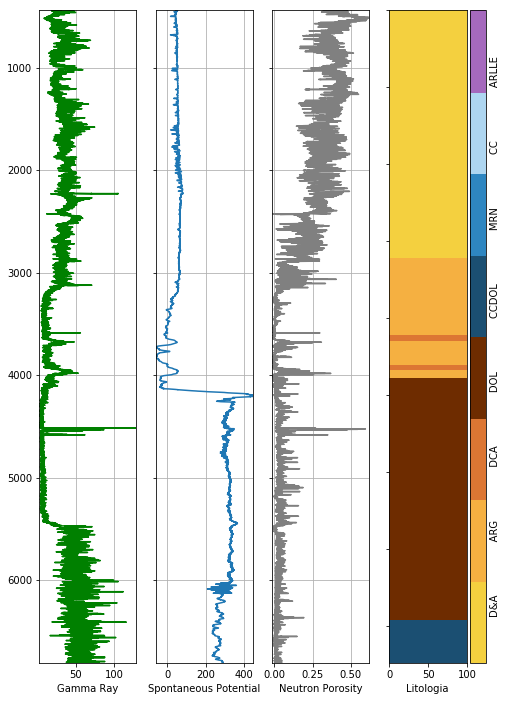

In [7]:
my_plot_values(df1, facies_colors)

In [8]:
#my_plot_values(df2, facies_colors)

In [9]:
#my_plot_values(df3, facies_colors)

In [10]:
#my_plot_values(df4, facies_colors)

In [11]:
#my_plot_values(df, facies_colors)

1 - Argille
2 - Calcari
3 - Marne
4 - Calcari dolomitizzati
5 - Dolomie
6 - Dolomie calcaree e anidriti
7 - Argilloscisti
8 - Dolomia e anidrite


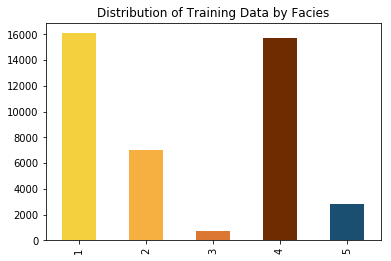

In [12]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = df['Litologia_Code'].value_counts().sort_index()
#use facies labels to index each count
#facies_counts.index = labels
print("1 - Argille\n2 - Calcari\n3 - Marne\n4 - Calcari dolomitizzati\n5 - Dolomie\n6 - Dolomie calcaree e anidriti\n7 - Argilloscisti\n8 - Dolomia e anidrite")
facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')

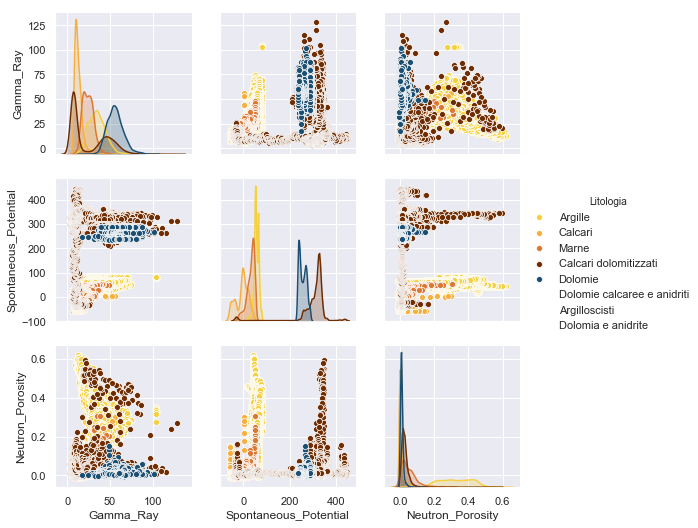

In [13]:
import seaborn as sns
sns.set()
sns.pairplot(df.drop(['Well_name','Litologia_Code', 'Depth'],axis=1),
             hue='Litologia', palette=facies_colors,
             hue_order=list(labels))

In [14]:
X = df[['Gamma_Ray', 'Neutron_Porosity', 'Spontaneous_Potential']].values # 1 Gamma Ray, 2 Spontaneous Potential, 3 Neutron Porosity 
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

features = ['Gamma_Ray', 'Neutron_Porosity', 'Spontaneous_Potential']

df_features = df[features].values
#print(df_features)


y = df.iloc[:, 6].values # Litologia_Code
y = np.array(y)
#print(y)
y = label_binarize(y, classes=[1,2,3])
#scaler = StandardScaler().fit(X)
#scaler_features = scaler.transform(X)
scaler = StandardScaler().fit(df_features)
scaler_features = scaler.transform(df_features)

In [15]:
#print(df)

In [16]:
#y_lit = df['Litologia_Code']
#y_lit = y_lit.unique()
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')

n_classes = y.shape[1]
y_lit_values = df['Litologia_Code'].values

X_train, X_test, y_train, y_test = train_test_split(df_features, y_lit_values, test_size = 0.40, random_state=0)
classifier = RandomForestClassifier(random_state=0)
#classifier = RandomForestClassifier(n_estimators=70, max_features=3, max_depth=10, min_samples_leaf=1)
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#print(f"Prediction on Y: {y_pred}")


In [17]:
class_names = df.iloc[:, 6]
#print(class_names)
from sklearn.utils.multiclass import unique_labels

Confusion matrix, without normalization
[[6337   82    0    0    0]
 [ 108 2638   39   21    0]
 [  22   68  238    0    0]
 [   0   89    0 6047  159]
 [   0    0    0  181  922]]
Normalized confusion matrix
[[0.99 0.01 0.   0.   0.  ]
 [0.04 0.94 0.01 0.01 0.  ]
 [0.07 0.21 0.73 0.   0.  ]
 [0.   0.01 0.   0.96 0.03]
 [0.   0.   0.   0.16 0.84]]


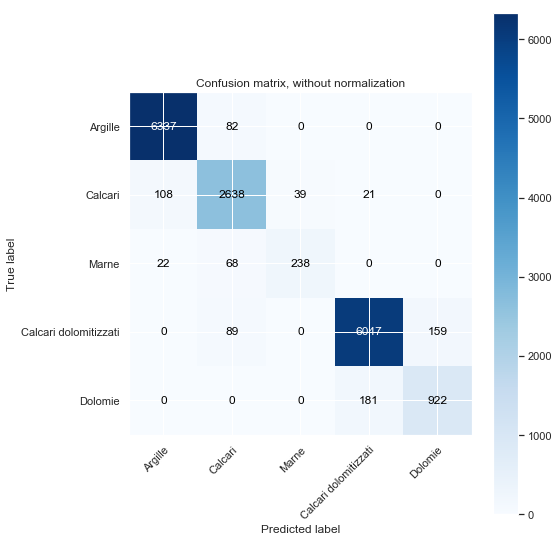

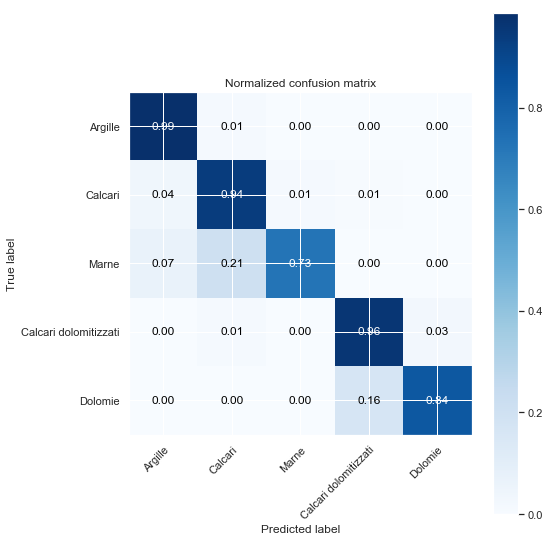

Accuracy: 0.9546339449000059
[[6337   82    0    0    0]
 [ 108 2638   39   21    0]
 [  22   68  238    0    0]
 [   0   89    0 6047  159]
 [   0    0    0  181  922]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      6419
           2       0.92      0.94      0.93      2806
           3       0.86      0.73      0.79       328
           4       0.97      0.96      0.96      6295
           5       0.85      0.84      0.84      1103

    accuracy                           0.95     16951
   macro avg       0.92      0.89      0.90     16951
weighted avg       0.95      0.95      0.95     16951

0.9546339449000059
Litologia Code = Argille: 1, Calcari: 2, Marne: 3, Calcari dolomitizzati: 4, Dolomie: 5, Dolomie calcaree e anidriti: 6, Argilloscisti: 7, Dolomia e anidrite: 8


In [18]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    from matplotlib.pyplot import figure
    #figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
    
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    #fig, ax = plt.subplots()
    fig = plt.figure(figsize=(8,8))
    ax = plt.subplot(111,aspect = 'equal')
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
    np.set_printoptions(precision=2)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=labels,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
#print('Litologia Code = Argille: 1, Calcari: 2, Marne: 3, Calcari dolomitizzati: 4, Dolomie: 5,', 'Dolomie calcaree e anidriti: 6,', 'Argilloscisti: 7,')
print('Litologia Code = Argille: 1, Calcari: 2, Marne: 3, Calcari dolomitizzati: 4, Dolomie: 5,', 'Dolomie calcaree e anidriti: 6,', 'Argilloscisti: 7,','Dolomia e anidrite: 8')
#'Argille', 'Calcari', 'Marne', 'Calcari dolomitizzati', 'Dolomie', 'Dolomie calcaree e anidriti', 'Argilloscisti', 'Dolomia e anidrite'

In [19]:
def my_plot_predictions(logs, predictions, facies_colors):
    
    ### The logs will be the dataset (df) information that we passes
    logs = logs.sort_values(by='Depth')
    
    # Build the colormap
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    cluster_predictions = np.repeat(np.expand_dims(predictions,1), 100, 1)
    
    # Create the cluster we will plot
    cluster = np.repeat(np.expand_dims(logs['Litologia_Code'].values,1), 100, 1)
    
    # plot the bars and assign for each bar a different information (Gamma Ray, Spontaneous Potential, Neutron Porosity)
    f, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (8, 12))
    ax[0].plot(logs.Gamma_Ray, logs.Depth, '-g')
    ax[1].plot(logs.Spontaneous_Potential, logs.Depth, '-')
    ax[2].plot(logs.Neutron_Porosity, logs.Depth, '-')
    
    
    # Here we will show the bar cluster with all the information and colormap legend
    im = ax[3].imshow(cluster, interpolation = 'none', aspect = 'auto', cmap = cmap_facies, vmin = 1, vmax = 9)
    im2 = ax[4].imshow(cluster_predictions, interpolation = 'none', aspect = 'auto', cmap = cmap_facies, vmin = 1, vmax = 9)
    
    ### Here we plot the "divider" which is the little bar showed next to the last bar (with colormap legend)
    divider = make_axes_locatable(ax[4])
    cax = divider.append_axes("right", size = "20%", pad = 0.05)
    cbar = plt.colorbar(im, cax = cax)
    #cbar.set_label((17*' ').join(['Argille', 'Calcari', 'Marne', 'Calcari dolomitizzati', 'Dolomie', 'Dolomie calcaree e anidriti', 'Argilloscisti', 'Dolomia e anidrite']))
    #cbar.set_label((17*' ').join(['Dolomia e anidrite', 'Argilloscisti', 'Dolomie calcaree e anidriti', 'Dolomie', 'Calcari dolomitizzati', 'Marne', 'Calcari', 'Argille']))
    cbar.set_label((17*' ').join(['ARG', 'DCA', 'DOL', 'CCDOL', 'MRN', 'CC', 'ARLLE']))
    cbar.set_ticks(range(0,1))
    cbar.set_ticklabels('')
    
    ### Here we will plot the little lines inside each bar
    for i in range(len(ax)-1):
        ax[i].set_ylim(logs.Depth.min(),logs.Depth.max())
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis = 'x', nbins = 3)
    
    
    ### Here we will put the names of each bar and set the x limits
    ax[0].set_xlabel("Gamma Ray")
    ax[0].set_xlim(logs.Gamma_Ray.min(),logs.Gamma_Ray.max())
    ax[1].set_xlabel("Spontaneous Potential")
    ax[1].set_xlim(logs.Spontaneous_Potential.min(),logs.Spontaneous_Potential.max())
    ax[2].set_xlabel("Neutron Porosity")
    ax[2].set_xlim(logs.Neutron_Porosity.min(),logs.Neutron_Porosity.max())
    ax[3].set_xlabel("Litologia")
    ax[4].set_xlabel("Predictions")
    
    ### Here we set the y-tick labes for each bar
    ax[0].set_yticklabels([])
    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([])

In [20]:
def compare_facies_plot(logs, compadre, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    ##### FILTERS TO AVOID PLOTTING NaN VALUES
    #gr_value = logs['Gamma_Ray'].values
    #sp_value = logs['Spontaneous_Potential'].values
    #np_value = logs['Neutron_Porosity'].values
    
    cluster1 = np.repeat(np.expand_dims(sorted(logs['Litologia_Code'].values),1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(compadre,1), 100, 1)
    ncl = 5
    ind = 0
    number = 0
    
    ### HERE FIRST I COUNT HOW MANY VALID COLUMNS (!=0) WE HAVE 
    if(not(logs['Gamma_Ray'] == 0).all()): number+=1
    if(not(logs['Spontaneous_Potential'] == 0).all()): number+=1
    if(not(logs['Neutron_Porosity'] == 0).all()): number+=1
        
    f, ax = plt.subplots(nrows=1, ncols=number+2, figsize=(9, 12))
    if(not(logs['Gamma_Ray'] == 0).all()):
        ax[ind].plot(logs.Gamma_Ray, logs.Depth, '-g')
        ax[ind].set_xlabel("Gamma_Ray")
        ax[ind].set_xlim(logs.Gamma_Ray.min(),logs.Gamma_Ray.max())
        ind+=1
    else:
        ncl-=1
    
    if(not(logs['Spontaneous_Potential'] == 0).all()):
        ax[ind].plot(logs.Spontaneous_Potential, logs.Depth, '-')
        ax[ind].set_xlabel("Spontaneous_Potential")
        ax[ind].set_xlim(logs.Spontaneous_Potential.min(),logs.Spontaneous_Potential.max())
        ax[ind].set_yticklabels([]); 
        ind+=1
    else:
        ncl-=1
        
    
    
 
    if(not(logs['Neutron_Porosity'] == 0).all()):
        ax[ind].plot(logs.Neutron_Porosity, logs.Depth, '-', color='0.5')
        ax[ind].set_xlabel("Neutron_Porosity")
        ax[ind].set_xlim(logs.Neutron_Porosity.min(),logs.Neutron_Porosity.max())
        ax[ind].set_yticklabels([]);
        ind+=1
    else:
        ncl-=1
    
    
    im1 = ax[ind].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,
                    vmin=1.0,
                    vmax=9.0)
    ax[ind].set_xlabel('Litologia_Code')
    ax[ind].set_yticklabels([]);
    
    ind+=1
    im2 = ax[ind].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,
                    vmin=1.0,
                    vmax=9.0)
    
    ax[ind].set_xlabel('Predictions')
    ax[ind].set_yticklabels([]);
    ax[ind].set_xticklabels([]);
    divider = make_axes_locatable(ax[ind])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im2, cax=cax)
    cbar.set_label((17*' ').join(['Argil', 'Cal', 'Mar', 'CD', 'Dol', 'DC', 'Agsc', 'DeA']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
   # print(len(ax))
   # print(ncl+1)
    if((len(ax) < (ncl+1))):
        for i in range((ncl+1)-len(ax)):
            ax[i].set_ylim(ztop,zbot)
            ax[i].invert_yaxis()
            ax[i].grid()
            ax[i].locator_params(axis='x', nbins=3)
            
    else:
        for i in range(len(ax)-(ncl+1)):
            
            ax[i].set_ylim(ztop,zbot)
            ax[i].set_ylim(zbot,ztop)
            ax[i].invert_yaxis()
            ax[i].grid()
            ax[i].locator_params(axis='x', nbins=3)


In [21]:
def compare_facies_plot1234(logs, compadre, cmp, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    print(f"COLORMAP: {cmap_facies}")
    #cluster1 = np.repeat(np.expand_dims(logs['Litologia_Code'].values,1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(compadre,1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(cmp, 1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=4, figsize=(9, 12))
    ax[0].plot(logs.Gamma_Ray, logs.Depth, '-g')
    ax[1].plot(logs.Neutron_Porosity, logs.Depth, '-', color='0.5')
    
    #ax[1].plot(logs.Spontaneous_Potential, logs.Depth, '-')
    
    #im1 = ax[2].imshow(cluster1, interpolation='none', aspect='auto',
    #                cmap=cmap_facies,
    #                vmin=1.0,
    #                vmax=9.0)
    
    im3 = ax[2].imshow(cluster3, interpolation='none', aspect='auto',
                    cmap=cmap_facies,
                    vmin=1.0,
                    vmax=9.0)
    im2 = ax[3].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,
                    vmin=1.0,
                    vmax=9.0)
    divider = make_axes_locatable(ax[3])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im3, cax=cax)
    cbar.set_label((17*' ').join(['Argil', 'Cal', 'Mar', 'CD', 'Dol', 'DC', 'Agsc', 'DeA']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-2):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Gamma_Ray")
    ax[0].set_xlim(logs.Gamma_Ray.min(),logs.Gamma_Ray.max())
    #ax[1].set_xlabel("Spontaneous_Potential")
    #ax[1].set_xlim(logs.Spontaneous_Potential.min(),logs.Spontaneous_Potential.max())
    ax[1].set_xlabel("Neutron_Porosity")
    ax[1].set_xlim(logs.Neutron_Porosity.min(),logs.Neutron_Porosity.max())
    
    #ax[2].set_xlabel('Litologia_Code')
    
    ax[2].set_xlabel('Predictions on Well4')
    ax[3].set_xlabel('Predictions on Well123')
    
    #ax[0].set_yticklabels([]);
    ax[1].set_yticklabels([]);
    ax[2].set_yticklabels([]);
    ax[3].set_yticklabels([]); 
    #ax[4].set_yticklabels([]);
    
    #ax[0].set_xticklabels([]);
    #ax[1].set_xticklabels([]);
    #ax[2].set_xticklabels([]);
    #ax[3].set_xticklabels([]);
    #ax[4].set_xticklabels([]);
    #f.suptitle('Well: %s'%logs.iloc[0]['Well Name'], fontsize=14,y=0.94)

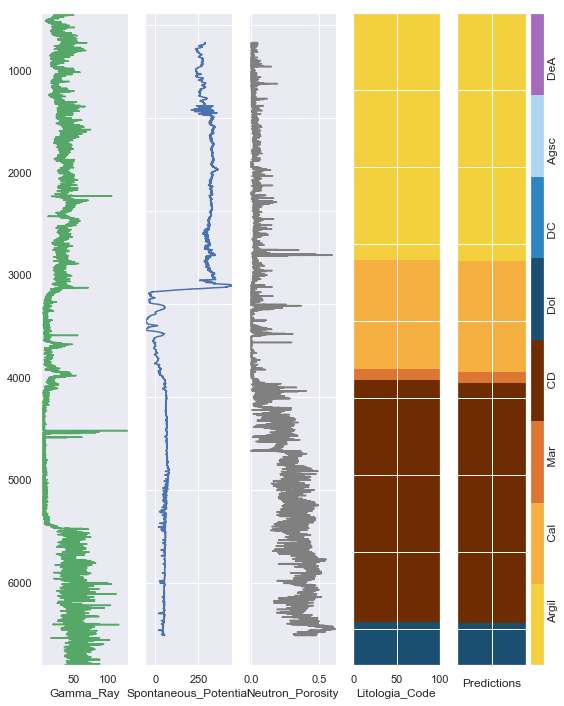

In [22]:
compare_facies_plot(df, sorted(y_pred), facies_colors)